# Pandas DataFrame for Data Analysis

## Preparation

- Bring your laptop
- Download and Install [Anaconda](https://www.continuum.io/downloads) (Python 3.5 version)
- Download file "Diamonds.csv" from [lecture repository](https://github.com/founderfan/Data-Open-Lecture)
- Open Jupyter Notebook
- Open saved notebook last time
    - or create a new notebook: Right-upper area $\rightarrow$ New $\rightarrow$ Notebooks $\rightarrow$ Python
- Be ready to type in code!

## What is Pandas

- An open source, BSD-licensed library for Python.
- Providing high-performance, easy-to-use data structures and data analysis tools

Reference: [Pandas official site](http://pandas.pydata.org/)

## Contents

1. Read Data
2. Data Types
3. Data Values
4. Index and Sort
5. Descriptive Analysis
    - Univariate and Bivariate
    - Numeric and Categorical
    - Tables and Plots
6. Apply
7. Missing Values
8. Groupby
9. Concatenate
10. Output

## Pandas DataFrame (1): Read Data

In [1]:
# Load modules and set options
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('precision', 3)
%matplotlib notebook
%cd ~/Stat

/Users/fangda/Stat


In [2]:
# pd.read_csv(): Read dataset "Diamonds"
da = pd.read_csv("Diamonds.csv")
da.shape

(53940, 11)

In [3]:
# head(): Head of data
da.head()

,n,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,NaN,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,NaN,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


## How to get help

- From Function Help: ? + function
    - ?pd.read_csv
    - ?da.head
- From Autofill with *Tab*:
    - pd. + *Tab*
    - (a pandas object). + *Tab*
- From Google: Your Question (what you want to do) + Pandas (DataFrame)
    - combine two DataFrames pandas
    - select a part of strings pandas
- From Official Website: http://pandas.pydata.org/
- From Online Course: https://www.datacamp.com/
- From Book: [Python for Data Analysis](http://www3.canisius.edu/~yany/python/Python4DataAnalysis.pdf), Wes McKinney

## Pandas DataFrame (2): Data Types

- Numeric: float, int (64 bits most often)
- Categorical: object
- Date/Time: datetime

In [4]:
da.dtypes

n            int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price      float64
x          float64
y          float64
z          float64
dtype: object

In [5]:
# Detailed data information
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
n          53940 non-null int64
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      39708 non-null float64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(7), int64(1), object(3)
memory usage: 4.5+ MB


## Pandas DataFrame (3.1): Data Values
- The values of Pandas Series/DataFrame are based on 1D/2D numpy array

In [6]:
# Select a column by name, and get a pandas Series
da["carat"].head()

0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
Name: carat, dtype: float64

In [7]:
da["carat"].values

array([ 0.23,  0.21,  0.23, ...,  0.7 ,  0.86,  0.75])

In [8]:
da.values

array([[1, 0.23, 'Ideal', ..., 3.95, 3.98, 2.43],
       [2, 0.21, 'Premium', ..., 3.89, 3.84, 2.31],
       [3, 0.23, 'Good', ..., 4.05, 4.07, 2.31],
       ..., 
       [53938, 0.7, 'Very Good', ..., 5.66, 5.68, 3.56],
       [53939, 0.86, 'Premium', ..., 6.15, 6.12, 3.74],
       [53940, 0.75, 'Ideal', ..., 5.83, 5.87, 3.64]], dtype=object)

## Pandas DataFrame (3.2): Assign Values

- DF[] = value: assign/revise a column in DataFrame directly
- DF.assign(\*\*kwargs): assign/revise column(s) and return a new DataFrame

In [9]:
pd.set_option('display.max_rows', 5)

In [10]:
da["heavy"] = da["carat"] > 0.5
da

,n,carat,cut,color,clarity,depth,table,price,x,y,z,heavy
0,1,0.23,Ideal,E,SI2,61.5,55.0,NaN,3.95,3.98,2.43,False
1,2,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,False
...,...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74,True
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,NaN,5.83,5.87,3.64,True


In [11]:
da.assign(intercept = 1, volume = lambda x: x["x"]*x["y"]*x["z"])

,n,carat,cut,color,clarity,depth,table,price,x,y,z,heavy,intercept,volume
0,1,0.23,Ideal,E,SI2,61.5,55.0,NaN,3.95,3.98,2.43,False,1,38.202
1,2,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,False,1,34.506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74,True,1,140.766
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,NaN,5.83,5.87,3.64,True,1,124.568


## Pandas DataFrame (4.1): Index

In [12]:
# DF.set_index(keys): Set column(s) as index for rows
da = da.set_index("n")
da

,carat,cut,color,clarity,depth,table,price,x,y,z,heavy
n,,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,NaN,3.95,3.98,2.43,False
2,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,False
...,...,...,...,...,...,...,...,...,...,...,...
53939,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74,True
53940,0.75,Ideal,D,SI2,62.2,55.0,NaN,5.83,5.87,3.64,True


In [13]:
# Check the index of rows and columns
da.index, da.columns

(Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
                10,
             ...
             53931, 53932, 53933, 53934, 53935, 53936, 53937, 53938, 53939,
             53940],
            dtype='int64', name='n', length=53940),
 Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
        'z', 'heavy'],
       dtype='object'))

## Pandas DataFrame (4.2): Indexing methods

- iloc[]: Indexing by index number like numpy array (right-edge not included)
- loc[]: indexing by either name or boolean

In [14]:
da.iloc[1:2, 2:7]

,color,clarity,depth,table,price
n,,,,,
2,E,SI1,59.8,61.0,326.0


In [15]:
da.loc[1:2, "color":"x"]

,color,clarity,depth,table,price,x
n,,,,,,
1,E,SI2,61.5,55.0,NaN,3.95
2,E,SI1,59.8,61.0,326.0,3.89


In [16]:
da.loc[da["color"] == "G", da.dtypes == "object"]

,cut,color,clarity
n,,,
26,Very Good,G,VVS2
52,Ideal,G,VS1
...,...,...,...
53914,Good,G,VS2
53930,Ideal,G,VS1


## Pandas DataFrame (4.3): Sort

- DF.sort_index(axis, level, ascending): sort by index
- DF.sort_values(by, axis, ascending): sort by values in column(s)

In [17]:
da.sort_index(ascending = False)

,carat,cut,color,clarity,depth,table,price,x,y,z,heavy
n,,,,,,,,,,,
53940,0.75,Ideal,D,SI2,62.2,55.0,NaN,5.83,5.87,3.64,True
53939,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74,True
...,...,...,...,...,...,...,...,...,...,...,...
2,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,False
1,0.23,Ideal,E,SI2,61.5,55.0,NaN,3.95,3.98,2.43,False


In [18]:
da.sort_values("carat", ascending = False)

,carat,cut,color,clarity,depth,table,price,x,y,z,heavy
n,,,,,,,,,,,
27416,5.01,Fair,J,I1,65.5,59.0,NaN,10.74,10.54,6.98,True
27631,4.50,Fair,J,I1,65.8,58.0,NaN,10.23,10.16,6.72,True
...,...,...,...,...,...,...,...,...,...,...,...
15,0.20,Premium,E,SI2,60.2,62.0,NaN,3.79,3.75,2.27,False
31597,0.20,Premium,F,VS2,62.6,59.0,367.0,3.73,3.71,2.33,False


## Pandas DataFrame (5.1.1): Univariate Description: Numeric

- Summary statistics: DF.describe()
- Histogram plot: DF.hist(column, by, bins)

In [19]:
da.describe()

,carat,depth,table,price,x,y,z
count,53940.000,53940.000,53940.000,39708.00,53940.000,53940.000,53940.000
mean,0.798,61.749,57.457,3928.36,5.731,5.735,3.539
...,...,...,...,...,...,...,...
75%,1.040,62.500,59.000,5302.25,6.540,6.540,4.040
max,5.010,79.000,95.000,18818.00,10.740,58.900,31.800


<IPython.core.display.Javascript object>


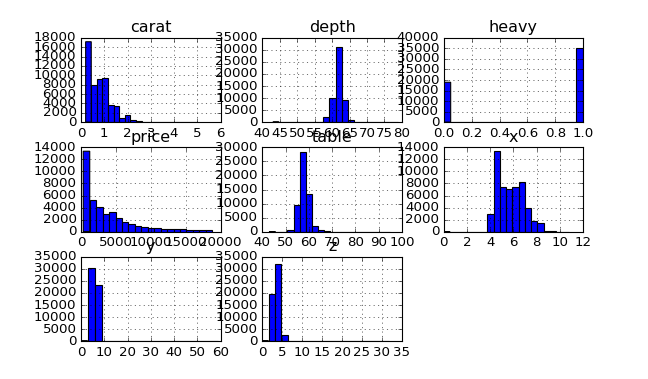

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115e364e0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d992f98>]], dtype=object)

In [20]:
da.hist(bins = 20)

## Pandas DataFrame (5.1.2): Univariate Description: Categorical

- Count values of each category: pd.value_counts(values)
- Bar-plot: pd.value_counts(values).plot(kind = "bar")

In [21]:
s = pd.value_counts(da["cut"])
s

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

<IPython.core.display.Javascript object>


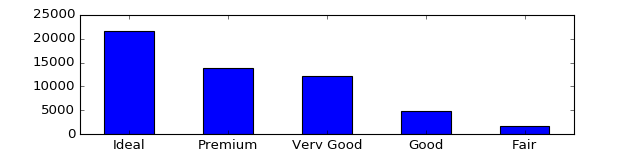

In [22]:
s.plot(kind = "bar", rot = 0)

## Pandas DataFrame (5.2.1): Bivariate Description: Num-Num

- correlation matrix: DF.corr()
- scatter plot: DF.plot(x, y, kind = "scatter")

In [23]:
da.corr()

,carat,depth,table,price,x,y,z,heavy
carat,1.000,0.028,0.182,0.923,0.975,0.952,0.953,0.687
depth,0.028,1.000,-0.296,-0.012,-0.025,-0.029,0.095,0.016
...,...,...,...,...,...,...,...,...
z,0.953,0.095,0.151,0.874,0.971,0.952,1.000,0.769
heavy,0.687,0.016,0.148,0.570,0.784,0.767,0.769,1.000


<IPython.core.display.Javascript object>


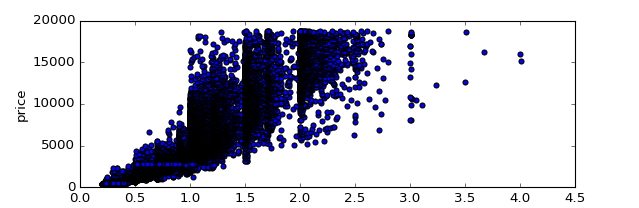

In [24]:
da.plot(x = "carat", y = "price", kind = "scatter", ylim = [0, 20000])

## Pandas DataFrame (5.2.2): Bivariate Description: Cat-Num

- Grouped summary statistics: DF.groupby(by)
- Boxplot: DF.boxplot(column, by)

In [25]:
da.groupby("cut").mean()

,carat,depth,table,price,x,y,z,heavy
cut,,,,,,,,
Fair,1.046,64.042,59.054,4358.958,6.247,6.183,3.983,0.880
Good,0.849,62.366,58.695,3927.028,5.839,5.851,3.640,0.718
Ideal,0.703,61.709,55.952,3456.976,5.507,5.520,3.401,0.575
Premium,0.892,61.265,58.746,4595.610,5.974,5.945,3.647,0.687
Very Good,0.806,61.818,57.956,3951.410,5.741,5.770,3.560,0.678


<IPython.core.display.Javascript object>


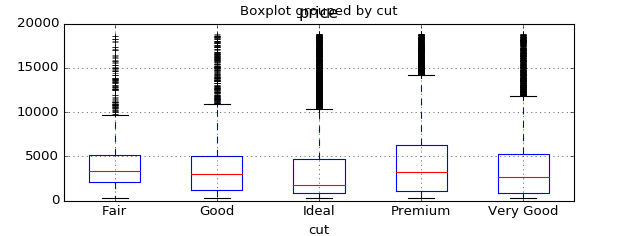

In [26]:
da.boxplot(column = "price", by = "cut")

## Pandas DataFrame (5.2.3): Bivariate Description: Cat-Cat

- cross table: pd.crosstab(index, columns)
- grouped line plot: pd.crosstab(index, columns).plot()

In [27]:
s = pd.crosstab(da["cut"], da["color"])
s

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,163,224,312,314,303,175,119
Good,662,933,909,871,702,522,307
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678


<IPython.core.display.Javascript object>


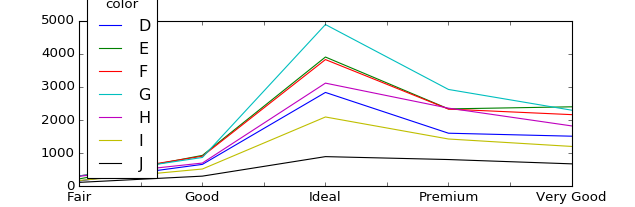

In [28]:
s.plot()

## Pandas DataFrame (6): Apply
- DT.apply(func, axis): Apply vector functions to each column/row of DataFrame

In [29]:
# Apply function to each column: 5 most frequent values
da.apply(lambda x: pd.Series(pd.value_counts(x).index[:5]))

,carat,cut,color,clarity,depth,table,price,x,y,z,heavy
0,0.30,Ideal,G,SI1,62.0,56.0,605.0,4.37,4.34,2.70,True
1,0.31,Premium,E,VS2,61.9,57.0,828.0,4.34,4.37,2.69,False
2,1.01,Very Good,F,SI2,61.8,58.0,776.0,4.33,4.35,2.71,NaN
3,0.70,Good,H,VS1,62.2,59.0,789.0,4.38,4.33,2.68,NaN
4,0.32,Fair,D,VVS2,62.1,55.0,666.0,4.32,4.32,2.72,NaN


In [30]:
# The Frequency of 5 most frequent values
da.apply(lambda x: pd.Series(pd.value_counts(x).values[:5]))

,carat,cut,color,clarity,depth,table,price,x,y,z,heavy
0,2604,21551,11292,13065,2239,9881,103,448,437,767,35008.0
1,2249,13791,9797,12258,2163,9724,96,437,435,748,18932.0
2,2242,12082,9542,9194,2077,8369,95,429,425,738,NaN
3,1981,4906,8304,8171,2039,6572,91,428,421,730,NaN
4,1840,1610,6775,5066,2020,6268,88,425,414,697,NaN


## Pandas DataFrame (7): Missing Values
- Find missing values (np.nan): DF.isnull()
- Fill missing values (np.nan): DF.fillna(value, method, axis)
- Drop missing values (np.nan): DF.dropna(axis, how)

In [32]:
da.fillna(da.mean())

,carat,cut,color,clarity,depth,table,price,x,y,z,heavy
n,,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,3928.36,3.95,3.98,2.43,False
2,0.21,Premium,E,SI1,59.8,61.0,326.00,3.89,3.84,2.31,False
...,...,...,...,...,...,...,...,...,...,...,...
53939,0.86,Premium,H,SI2,61.0,58.0,2757.00,6.15,6.12,3.74,True
53940,0.75,Ideal,D,SI2,62.2,55.0,3928.36,5.83,5.87,3.64,True


In [33]:
da.dropna()

,carat,cut,color,clarity,depth,table,price,x,y,z,heavy
n,,,,,,,,,,,
2,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,False
4,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,False
...,...,...,...,...,...,...,...,...,...,...,...
53937,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61,True
53939,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74,True


## Pandas DataFrame (8): Groupby
- DF.groupby(by): create a group of dataframes for function apply
- DF.aggregate(arg): apply any function(s) on a groupby object

In [34]:
group = da.groupby(["cut"])
group.mean()

,carat,depth,table,price,x,y,z,heavy
cut,,,,,,,,
Fair,1.046,64.042,59.054,4358.958,6.247,6.183,3.983,0.880
Good,0.849,62.366,58.695,3927.028,5.839,5.851,3.640,0.718
Ideal,0.703,61.709,55.952,3456.976,5.507,5.520,3.401,0.575
Premium,0.892,61.265,58.746,4595.610,5.974,5.945,3.647,0.687
Very Good,0.806,61.818,57.956,3951.410,5.741,5.770,3.560,0.678


In [35]:
group.aggregate([np.mean, np.std])

carat          depth          table            price            \
            mean    std    mean    std    mean    std      mean       std   
cut                                                                         
Fair       1.046  0.516  64.042  3.643  59.054  3.946  4358.958  3498.143   
Good       0.849  0.454  62.366  2.169  58.695  2.851  3927.028  3691.613   
Ideal      0.703  0.433  61.709  0.719  55.952  1.246  3456.976  3821.225   
Premium    0.892  0.515  61.265  1.159  58.746  1.479  4595.610  4364.236   
Very Good  0.806  0.459  61.818  1.379  57.956  2.121  3951.410  3911.626   

               x             y             z         heavy         
            mean    std   mean    std   mean    std   mean    std  
cut                                                                
Fair       6.247  0.964  6.183  0.956  3.983  0.652  0.880  0.325  
Good       5.839  1.057  5.851  1.052  3.640  0.655  0.718  0.450  
Ideal      5.507  1.064  5.520  1.074  3.401  0.658  0.575  0.494  
Premium    5.974  1.188  5.945  1.260  3.647  0.731  0.687  0.464  
Very Good  5.741  1.101  5.770  1.103  3.560  0.730  0.678  0.467

## Pandas DataFrame (9): Concatenate

- pd.concat(objs, axis, join, keys): join multiple DataFrames/Series by row/column
- DT.join(other, on, how): join a DataFrame with another by column

In [36]:
s = da.dtypes.rename("Type")
pd.concat([da.describe().T, s], axis = 1)

,count,mean,std,min,25%,50%,75%,max,Type
carat,53940.0,0.798,0.474,0.2,0.40,0.70,1.04,5.01,float64
clarity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object
...,...,...,...,...,...,...,...,...,...
y,53940.0,5.735,1.142,0.0,4.72,5.71,6.54,58.90,float64
z,53940.0,3.539,0.706,0.0,2.91,3.53,4.04,31.80,float64


In [37]:
da.describe().T.join(s)

,count,mean,std,min,25%,50%,75%,max,Type
carat,53940.0,0.798,0.474,0.2,0.40,0.70,1.04,5.01,float64
depth,53940.0,61.749,1.433,43.0,61.00,61.80,62.50,79.00,float64
...,...,...,...,...,...,...,...,...,...
y,53940.0,5.735,1.142,0.0,4.72,5.71,6.54,58.90,float64
z,53940.0,3.539,0.706,0.0,2.91,3.53,4.04,31.80,float64


## Pandas DataFrame (10): Output

- DT.to_csv(path_or_buf, sep, index): write a csv file, easy and general
- DT.to_hdf(path_or_buf, key, complevel): faster for big data with dtypes saved, a key is required

In [38]:
da.describe().T.to_csv("Diamonds_summary.csv")

In [39]:
da.to_hdf("Diamonds_hdf.h5", key = "Diamonds")

In [40]:
pd.read_hdf("Diamonds_hdf.h5", key = "Diamonds")

,carat,cut,color,clarity,depth,table,price,x,y,z,heavy
n,,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,NaN,3.95,3.98,2.43,False
2,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,False
...,...,...,...,...,...,...,...,...,...,...,...
53939,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74,True
53940,0.75,Ideal,D,SI2,62.2,55.0,NaN,5.83,5.87,3.64,True


In [ ]:
'''
For to Us a Child Is Born


    For to us a child is born,

        to us a son is given;

    and the government shall be upon his shoulder,

        and his name shall be called

    Wonderful Counselor, Mighty God,

        Everlasting Father, Prince of Peace.


    
(Isaiah 9:6 ESV)
'''